# Skill Finder Analysis

The main problems we want to focus on:

1. For each state, how many jobs are available (could create heat map if possible)

2. For each state, list the top 5 cities with most jobs available.

3. List 10 companies that offer most technology jobs (if use Kaggle dataset)

4. Among all the jobs, count the number of occurrence for each skill and list the top10 popular skills

5. For the five cites with most jobs, list the top5 popular skills (check whether the need for skills may vary among cities)

6. The top five popular Database used

7. For each education level, what’s the average years of experience needed.

8. Based on the years of experience, compare the number of jobs available that needs YOE =0(New Grad), 1-4(Junior), >5(Senior).

9. Compare whether skills needed for different job titles vary.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
SDEio = 'SoftwareEngineerData/outputSoftwareEngineer.xlsx'
DSio = 'DataScientistData/outputDataScientist.xlsx'

In [3]:
sde_data = pd.read_excel(io=SDEio)
ds_data = pd.read_excel(io=DSio)

In [4]:
sde_data

,Unnamed: 0,description,python,scala,.net,c#,matlab,simulink,linux,agile,...,rust,haskell,erlang,clojure,html5,zip,state,city,YOE,Min Ed Level
0,100233903,spacex was founded under the belief that a fut...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,ca,hawthorne,2.0,NaN
1,106869885,ebsco information services (eis) provides a co...,0,1,1,1,0,0,0,1,...,0,0,0,0,0,NaN,al,birmingham,1.0,bachelor
2,113708722,spacex was founded under the belief that a fut...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,NaN,ca,hawthorne,2.0,NaN
3,123862058,spacex was founded under the belief that a fu...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,ca,hawthorne,2.0,bachelor
4,126245384,spacex was founded under the belief that a fut...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,NaN,ca,hawthorne,2.0,bachelor
5,135081815,summary summary\n\n\n\njobs\n\n\n\n\n\n\nsearc...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,35233.0,al,birmingham,3.0,associate
6,138087783,summary summary\n\n\n\njobs\n\n\n\n\n\n\nsearc...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,35233.0,al,birmingham,3.0,associate
7,142979972,spacex was founded under the belief that a fut...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,ca,hawthorne,2.0,bachelor
8,143163409,sierra nevada corporationâ€™s electronic and i...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,75023.0,tx,plano,NaN,NaN
9,146117027,primarily responsible for the day-to-day manag...,0,1,0,0,0,0,0,0,...,0,0,0,0,0,44101.0,oh,cleveland,5.0,bachelor


In [5]:
ds_data

,Unnamed: 0,description,python,scala,.net,c#,matlab,simulink,linux,agile,...,rust,haskell,erlang,clojure,html5,zip,state,city,YOE,Min Ed Level
0,145347322,"headquartered in lynchburg, va., bwx technolog...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,va,lynchburg,3.0,master
1,145347326,"headquartered in lynchburg, va., bwx technolog...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,tn,oak ridge,3.0,master
2,150181058,\n\n\n\njobs\n\n\n\n\n\n\nsearch jobs\n\n\n\n\...,0,1,0,0,0,0,0,0,...,0,0,0,0,0,NaN,in,indianapolis,5.0,master
3,151232338,job summaryessential duties and responsibiliti...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,ma,boston,NaN,NaN
4,151236031,core technologies used in the data science tea...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,wa,seattle,2.0,master
5,153868726,"â help lead the design, development, and relea...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,NaN,va,arlington,1.0,NaN
6,155732777,data scientist & senior data scientistlocation...,1,0,0,0,1,0,0,0,...,0,0,0,0,0,NaN,ny,new york,2.0,NaN
7,155761486,title: developer - seniorlocation: overland p...,1,1,0,0,0,0,0,0,...,0,0,0,0,0,NaN,ks,overland park,4.0,NaN
8,155826457,where good people build rewarding careers.thin...,1,0,0,0,1,0,0,0,...,0,0,0,0,0,NaN,il,northbrook,NaN,master
9,155826497,where good people build rewarding careers.thin...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,wa,bothell,NaN,NaN


### For each state, how many jobs are available (could create heat map if possible)

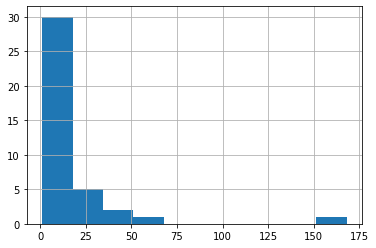

In [9]:
sde_data['state'].value_counts().hist()

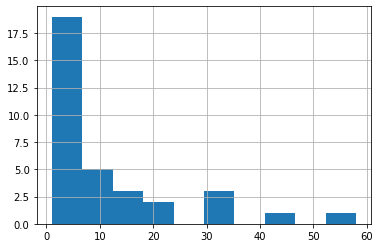

In [10]:
ds_data['state'].value_counts().hist()

### For each state, list the top 5 cities with most jobs available.

In [32]:
sde_data['state'].value_counts().get('ca')

168

In [55]:
dic = {" ":0}
for col in sde_data.columns: 
    temp = sde_data[col].value_counts().get(1)
    if temp is not None:
        dic[col] = temp

In [56]:
dic

{' ': 0,
 'Unnamed: 0': 1,
 'python': 160,
 'scala': 110,
 '.net': 87,
 'c#': 122,
 'matlab': 19,
 'simulink': 6,
 'linux': 124,
 'agile': 153,
 'ns3': 2,
 'opnet': 2,
 'snmp': 5,
 'rmon': 2,
 'wireshark': 4,
 'penetration testing': 2,
 'java': 250,
 'secure boot': 2,
 'tcp/ip': 15,
 'udp': 8,
 'javascript': 152,
 'mongodb': 16,
 'mysql': 49,
 'amazon web services': 18,
 'aws': 112,
 'oracle': 47,
 'redis': 13,
 'react': 87,
 'backbone': 3,
 'angular': 76,
 'google cloud platform': 5,
 'html': 64,
 'css': 60,
 'x86': 5,
 'powerpc': 3,
 'arm': 43,
 'device drivers': 5,
 'vmware esx': 6,
 'nosql': 41,
 'sql': 174,
 'bitbucket': 8,
 'confluence': 9,
 'jenkins': 43,
 'doxygen': 2,
 'communication': 227,
 'teamwork': 27,
 'dspace': 2,
 'vehiclespy': 2,
 'canalyzer': 3,
 'webgl': 5,
 'distributed': 91,
 'kafka': 19,
 'angularjs': 23,
 'mithrilinteractive': 2,
 'ui/ux': 8,
 'opengl': 9,
 'ios': 61,
 'android': 34,
 'julia': 3,
 'visualbasic': 2,
 'cobol': 2,
 'jira': 31,
 'gitlab': 6,
 'redux

In [57]:
print(type(dic))

<class 'dict'>


In [60]:
dic = sorted(dic.items(), key=lambda item: item[1], reverse=True)
dic

[('java', 250),
 ('communication', 227),
 ('sql', 174),
 ('python', 160),
 ('c++', 155),
 ('agile', 153),
 ('javascript', 152),
 ('git', 148),
 ('linux', 124),
 ('c#', 122),
 ('aws', 112),
 ('scala', 110),
 ('YOE', 108),
 ('distributed', 91),
 ('.net', 87),
 ('react', 87),
 ('angular', 76),
 ('html', 64),
 ('ios', 61),
 ('css', 60),
 ('state', 59),
 ('mysql', 49),
 ('oracle', 47),
 ('docker', 47),
 ('machine learning', 44),
 ('arm', 43),
 ('jenkins', 43),
 ('nosql', 41),
 ('devops', 40),
 ('kubernetes', 40),
 ('unix', 39),
 ('oop', 39),
 ('rust', 39),
 ('android', 34),
 ('jira', 31),
 ('json', 29),
 ('perl', 28),
 ('teamwork', 27),
 ('city', 27),
 ('puppet', 25),
 ('rest api', 24),
 ('angularjs', 23),
 ('xml', 23),
 ('html5', 20),
 ('matlab', 19),
 ('kafka', 19),
 ('s3', 19),
 ('amazon web services', 18),
 ('hadoop', 18),
 ('spark', 18),
 ('golang', 18),
 ('mongodb', 16),
 ('maven', 16),
 ('tcp/ip', 15),
 ('ansible', 15),
 ('rdbms', 15),
 ('postgresql', 15),
 ('junit', 14),
 ('chef', 1

In [61]:
dic.hist()

AttributeError: 'list' object has no attribute 'hist'